In [1]:
import cv2 as cv
import pandas as pd 
import numpy as np
import os
import glob
from skimage.feature import hog
import matplotlib.pyplot as plt
from sklearn.neighbors  import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from collections import defaultdict
import random

### Gray Scale to 1D Array with HOG and Regular Resize Image

In [2]:
def grayscale(img):
    imgs = np.array(cv.imread(img))
    # converting BGR to RGB
    img_rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
    gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
    return gray

def flat(img):
    pixel = img.flatten()
    return pixel

def resizeforHOG(img):
    resize_img = cv.resize(img,(128,64))
    feature , hog_img= hog(resize_img, pixels_per_cell=(8, 8),cells_per_block=(2, 2),visualize=True)
    return feature, hog_img

def only_resize(img):
    resize_img = cv.resize(img,(128,64))
    return resize_img

### Load Training Data

In [3]:
# Matrix 1D Array
X_train = []
y_train = []

# HOG Matrix 1D Array With Normailize from (0,1)
X_train_HOG = []
y_train_HOG = []


for i, happy in enumerate(glob.glob('Happy/train/*happy*.jpg')):
    try:
        # happy:0
        if i < 1368: # undersampling b/c there are only 1336 images in angry folder
            classes = 0
            gray = grayscale(happy)

            # Only resize and flatten without normailiz
            resize = only_resize(gray)
            pixel = flat(resize)
            X_train.append(pixel)
            y_train.append(classes)
            # HOG with 1d Array and Normailize from (0,1)
            HOG , img_HOG = resizeforHOG(gray)
            X_train_HOG.append(HOG)
            y_train_HOG.append(classes)
    except Exception:
        pass

for i, sad in enumerate(glob.glob('Sad/train/*sad*.jpg')):
    try:  
        # sad: 1
        if i < 1368:
            classes = 1
            gray = grayscale(sad)

            # Only resize and flatten without normailiz
            resize = only_resize(gray)
            pixel = flat(resize)
            X_train.append(pixel)
            y_train.append(classes)
            # HOG with 1d Array and Normailize from (0,1)
            HOG , img_HOG = resizeforHOG(gray)
            X_train_HOG.append(HOG)
            y_train_HOG.append(classes)
    except Exception:
        pass
    
for i, sad in enumerate(glob.glob('Angry/train/*angry*.jpg')):
    try:  
        # angry: 2
        if i < 1368:
            classes = 2
            gray = grayscale(sad)

            # Only resize and flatten without normailiz
            resize = only_resize(gray)
            pixel = flat(resize)
            X_train.append(pixel)
            y_train.append(classes)
            # HOG with 1d Array and Normailize from (0,1)
            HOG , img_HOG = resizeforHOG(gray)
            X_train_HOG.append(HOG)
            y_train_HOG.append(classes)
    except Exception:
        pass

### Load Test Data

In [4]:
# Matrix 1D Array
X_test = []
y_test = []

# HOG Matrix 1D Array With Normailize from (0,1)
X_test_HOG = []
y_test_HOG = []


for i, happy in enumerate(glob.glob('Happy/test/*happy*.jpg')):
    try:
        # happy:0
        classes = 0
        gray = grayscale(sad)

        # Only resize and flatten without normailiz
        resize = only_resize(gray)
        pixel = flat(resize)
        X_test.append(pixel)
        y_test.append(classes)
        # HOG with 1d Array and Normailize from (0,1)
        HOG , img_HOG = resizeforHOG(gray)
        X_test_HOG.append(HOG)
        y_test_HOG.append(classes)
    except Exception:
        pass

for i, sad in enumerate(glob.glob('Sad/test/*sad*.jpg')):
    try:  
        # sad: 1
        classes = 1
        gray = grayscale(sad)

        # Only resize and flatten without normailiz
        resize = only_resize(gray)
        pixel = flat(resize)
        X_test.append(pixel)
        y_test.append(classes)
        # HOG with 1d Array and Normailize from (0,1)
        HOG , img_HOG = resizeforHOG(gray)
        X_test_HOG.append(HOG)
        y_test_HOG.append(classes)
    except Exception:
        pass
    
for i, sad in enumerate(glob.glob('Angry/test/*angry*.jpg')):
    try:  
        # angry: 2
        
        classes = 2
        gray = grayscale(sad)

        # Only resize and flatten without normailiz
        resize = only_resize(gray)
        pixel = flat(resize)
        X_test.append(pixel)
        y_test.append(classes)
        # HOG with 1d Array and Normailize from (0,1)
        HOG , img_HOG = resizeforHOG(gray)
        X_test_HOG.append(HOG)
        y_test_HOG.append(classes)
    except Exception:
        pass

### Training and test set before normalization

In [5]:
train_before_norm = pd.DataFrame(X_train)
train_before_norm['class'] = y_train
train_hog_before_norm = pd.DataFrame(X_train_HOG)
train_hog_before_norm['class'] = y_train_HOG
test_before_norm = pd.DataFrame(X_test)
test_before_norm['class'] = y_test
test_hog_before_norm = pd.DataFrame(X_test_HOG)
test_hog_before_norm['class'] = y_test_HOG

In [6]:
train_before_norm

,0,1,2,3,4,5,6,7,8,9,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,29,35,38,37,39,37,37,27,39,32,...,26,29,29,27,29,38,28,33,31,0
2,30,159,156,155,157,157,157,158,159,160,...,128,122,122,124,122,123,123,125,30,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30,29,29,30,31,30,29,30,29,29,...,30,30,30,29,29,29,29,29,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4100,174,177,159,181,201,196,200,204,199,189,...,79,62,64,63,56,61,65,63,61,2
4101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4102,77,78,78,72,63,65,65,64,66,72,...,52,53,50,46,42,51,59,57,56,2


In [39]:
pd.set_option("max_columns", 15)
train_hog

,0,1,2,3,4,5,6,...,3774,3775,3776,3777,3778,3779,class
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.295477,0.230665,0.094250,0.230103,0.295477,0.064912,0.015113,...,0.038281,0.185461,0.147163,0.126031,0.247489,0.229997,0
2,0.334228,0.009452,0.031156,0.056837,0.300228,0.130104,0.017637,...,0.287004,0.213844,0.220212,0.130710,0.160133,0.123283,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.230901,0.134903,0.111680,0.015779,0.245062,0.000000,0.201427,...,0.009969,0.341221,0.048991,0.104766,0.083573,0.100239,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
4100,0.146742,0.007514,0.048162,0.011035,0.386560,0.386560,0.386560,...,0.066284,0.286542,0.019127,0.005387,0.146031,0.264305,2
4101,0.000000,0.000000,0.000000,0.000000,0.084243,0.000000,0.000000,...,0.000000,0.227562,0.000000,0.000000,0.000000,0.000000,2
4102,0.222622,0.201274,0.021365,0.181666,0.322899,0.111277,0.004210,...,0.187342,0.051735,0.209615,0.040362,0.027959,0.017448,2


In [8]:
test_before_norm

,0,1,2,3,4,5,6,7,8,9,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,class
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,19,18,26,30,26,27,27,38,37,30,...,16,27,29,27,22,29,29,34,34,2
162,6,5,5,6,6,7,5,8,5,6,...,5,4,7,11,14,21,21,18,16,2
163,5,7,2,50,8,6,10,18,16,18,...,124,125,125,123,129,125,130,133,131,2
164,63,46,45,37,39,37,36,38,70,103,...,86,66,93,67,45,91,89,87,91,2


In [40]:
pd.set_option("max_columns", 15)
test_hog

,0,1,2,3,4,5,6,...,3774,3775,3776,3777,3778,3779,class
0,0.031889,0.000000,0.000000,0.000000,0.001180,0.000000,0.000000,...,0.000000,0.000715,0.000000,0.000000,0.000000,0.000000,0
1,0.031889,0.000000,0.000000,0.000000,0.001180,0.000000,0.000000,...,0.000000,0.000715,0.000000,0.000000,0.000000,0.000000,0
2,0.031889,0.000000,0.000000,0.000000,0.001180,0.000000,0.000000,...,0.000000,0.000715,0.000000,0.000000,0.000000,0.000000,0
3,0.031889,0.000000,0.000000,0.000000,0.001180,0.000000,0.000000,...,0.000000,0.000715,0.000000,0.000000,0.000000,0.000000,0
4,0.031889,0.000000,0.000000,0.000000,0.001180,0.000000,0.000000,...,0.000000,0.000715,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,0.157192,0.167754,0.266449,0.093650,0.139656,0.005070,0.016066,...,0.109320,0.230601,0.195098,0.199487,0.174118,0.135153,2
162,0.077374,0.066090,0.071835,0.009768,0.043685,0.014652,0.030890,...,0.009552,0.445244,0.445244,0.003539,0.002798,0.011870,2
163,0.206349,0.037894,0.248027,0.035022,0.248027,0.023824,0.098246,...,0.134735,0.232557,0.050077,0.016088,0.019961,0.000000,2
164,0.307842,0.307842,0.307842,0.028090,0.014269,0.039548,0.038917,...,0.254572,0.185114,0.025255,0.083379,0.086672,0.214596,2


In [10]:
train_before_norm.to_csv('train_before_norm_pca.csv', index = False)
train_hog.to_csv('train_hog_before_pca.csv', index = False)
test_before_norm.to_csv('test_before_norm_pca.csv', index = False)
test_hog.to_csv('test_hog_before_pca.csv', index = False)

### Min-Max

In [11]:
df = pd.DataFrame(X_train)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
#x after normalization
df = pd.DataFrame(scaled)

In [41]:
pd.set_option("max_columns", 15)
df


,0,1,2,3,4,5,6,...,8185,8186,8187,8188,8189,8190,8191
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
1,0.117886,0.137255,0.149020,0.145098,0.153543,0.145669,0.145098,...,0.114173,0.106299,0.113725,0.149606,0.110236,0.129921,0.124
2,0.121951,0.623529,0.611765,0.607843,0.618110,0.618110,0.615686,...,0.480315,0.488189,0.478431,0.484252,0.484252,0.492126,0.120
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
4,0.121951,0.113725,0.113725,0.117647,0.122047,0.118110,0.113725,...,0.118110,0.114173,0.113725,0.114173,0.114173,0.114173,0.116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
4100,0.707317,0.694118,0.623529,0.709804,0.791339,0.771654,0.784314,...,0.251969,0.248031,0.219608,0.240157,0.255906,0.248031,0.244
4101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
4102,0.313008,0.305882,0.305882,0.282353,0.248031,0.255906,0.254902,...,0.196850,0.181102,0.164706,0.200787,0.232283,0.224409,0.224


### PCA + Min-Max

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4096) 
pca.fit(df)


PCA(n_components=4096)

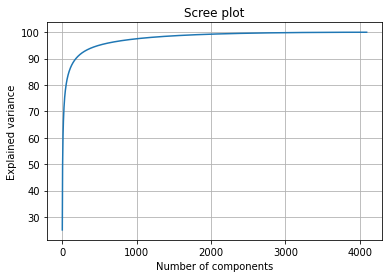

In [15]:
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Scree plot');

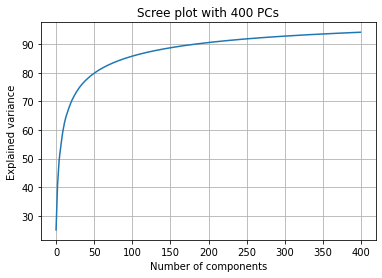

In [16]:
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100)[:400])
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Scree plot with 400 PCs');

We chose 150 PCs from the scree plot.

In [17]:
pca = PCA(n_components=150)

# x_train after pca
x_train_minmax_pca = pca.fit_transform(df)

In [43]:
pd.DataFrame(x_train_minmax_pca)

,0,1,2,3,4,5,6,...,143,144,145,146,147,148,149
0,8.166903,-12.668767,0.218082,-0.344074,5.600670,5.934045,-3.881370,...,0.509113,0.097960,0.002278,-0.073858,0.113273,-0.660614,-0.488384
1,-14.650498,4.406504,-4.613436,3.716961,-4.468136,-0.865621,-2.179394,...,0.144776,-0.630600,0.262949,-0.847841,-0.382683,-0.228789,0.105320
2,1.105568,6.971270,3.626300,-3.897901,-2.461277,0.196825,1.531002,...,-0.943447,0.074357,0.739984,-0.279905,0.294105,0.731992,0.057367
3,-9.082104,0.644586,-5.085973,-0.927066,6.086454,3.590023,-3.044277,...,0.705066,0.611364,0.238095,-0.174444,-0.163275,-0.370784,-0.199728
4,-10.330461,3.278926,0.029198,-2.804916,-6.350097,0.443278,0.160652,...,-0.604124,0.668125,0.310991,-0.175804,1.256250,0.094957,0.603147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099,-5.038335,-5.321415,-6.434426,3.884987,5.462933,-4.250667,-0.397245,...,0.229421,0.391247,0.159238,0.176623,0.307703,0.712982,-0.468457
4100,7.770533,3.416131,1.266564,-0.826742,-6.366318,-0.452589,-1.499698,...,0.495626,-0.240147,-0.144361,0.495263,-0.201807,0.714279,0.751938
4101,-7.503397,-3.907352,-2.494775,4.845937,-1.350850,4.639844,-0.490733,...,0.195759,0.554178,-0.165000,0.424234,0.200312,0.365463,-0.171524
4102,4.316754,11.393862,-5.441731,-2.255980,0.962183,2.082642,-0.676253,...,0.529007,-0.160730,0.535626,-1.091756,-0.354707,0.262903,-0.480502


### PCA + HOG

In [18]:
df_hog = pd.DataFrame(X_train_HOG)

In [19]:
pca_hog = PCA(n_components=3780)
pca_hog.fit(df_hog)


PCA(n_components=3780)

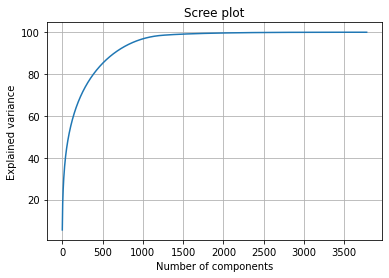

In [20]:
plt.grid()
plt.plot(np.cumsum(pca_hog.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Scree plot');

Choose 1000 PCs.

In [21]:
pca_hog = PCA(n_components=1000)
# x_train for hog after pca
x_train_hog_pca = pca_hog.fit_transform(df_hog)


In [44]:
pd.set_option("max_columns", 15)
pd.DataFrame(x_train_hog_pca)

,0,1,2,3,4,5,6,...,993,994,995,996,997,998,999
0,2.275063,1.654999,0.245994,-0.489582,-0.414901,-0.188723,-1.296060,...,0.047253,-0.044772,0.029670,0.008271,-0.018385,-0.001936,-0.011264
1,-1.497261,-0.795530,-0.320514,-0.516425,-0.808207,-0.161066,-0.916639,...,0.008107,-0.020033,0.068386,0.032810,-0.128166,-0.069855,-0.136137
2,-0.314832,0.321920,-2.377479,-0.286048,1.082833,0.732763,-0.284559,...,0.007141,0.044677,0.032570,0.004041,-0.109291,0.044410,-0.045451
3,2.335165,1.912699,0.780651,0.453585,-0.106000,-0.048543,-0.562543,...,0.029171,-0.065753,0.042352,-0.029435,-0.030809,-0.069487,0.055167
4,-0.744245,0.481764,0.206195,2.210524,-0.001667,-1.355367,1.072733,...,0.078403,0.106332,0.058540,0.046592,0.085900,0.000873,0.019542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099,2.466138,-0.863740,-0.158477,-0.006443,-0.021481,-0.568950,-0.122673,...,-0.012004,0.071154,0.019640,0.065846,-0.040172,0.057024,0.038765
4100,-0.254445,0.066334,-1.358853,0.298962,-1.194225,0.136315,-0.454454,...,-0.025588,-0.011680,0.017482,-0.026246,0.042216,-0.005147,0.062587
4101,0.364328,1.613180,0.819550,-0.659463,0.013645,0.960059,0.986714,...,0.040968,-0.064080,0.123574,0.051921,-0.135399,-0.007491,-0.027753
4102,-1.825023,-0.324267,-0.398675,-0.909876,-0.170342,-0.126019,0.340082,...,0.033242,-0.110565,0.097176,-0.087817,-0.052088,-0.029115,-0.046700


## X_train

### X_train for minmax+pca

In [23]:
train_minmax_pca = pd.DataFrame(x_train_minmax_pca)
train_minmax_pca['class'] = y_train
train_minmax_pca = pd.DataFrame(train_minmax_pca)
train_minmax_pca.to_csv('train_minmax_pca.csv', index = False)

### X_train for hog+pca

In [24]:
train_pca_hog = pd.DataFrame(x_train_hog_pca)
train_pca_hog['class'] = y_train_HOG
train_pca_hog = pd.DataFrame(train_pca_hog)
train_pca_hog.to_csv('train_pca_hog.csv', index = False)

## X_test 

### Transform X_test for minmax+pca

In [25]:
df_test = pd.DataFrame(X_test)

In [26]:
# Transform X_test for minmax+pca
x_test_pca = scaler.transform(df_test)
x_test_pca = pca.transform(df_test)
x_test_pca = pd.DataFrame(x_test_pca)

In [27]:
test_set_pca = x_test_pca
test_set_pca['class'] = y_test

In [28]:
test_set_pca.to_csv('test_minmax_pca.csv', index = False)

### Transform X_test for hog+pca

In [29]:
df_test_hog = pd.DataFrame(X_test_HOG)
x_test_hog_pca = pca_hog.transform(df_test_hog)
x_test_hog_pca = pd.DataFrame(x_test_hog_pca)

In [30]:
x_test_hog_pca

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.001596,-0.328482,-0.986900,1.536983,-0.792288,0.576526,-1.179224,0.690147,0.426359,0.302359,...,-0.026921,0.054343,-0.100259,-0.002304,-0.125341,0.046937,-0.085882,-0.030419,-0.053924,0.037165
1,-0.001596,-0.328482,-0.986900,1.536983,-0.792288,0.576526,-1.179224,0.690147,0.426359,0.302359,...,-0.026921,0.054343,-0.100259,-0.002304,-0.125341,0.046937,-0.085882,-0.030419,-0.053924,0.037165
2,-0.001596,-0.328482,-0.986900,1.536983,-0.792288,0.576526,-1.179224,0.690147,0.426359,0.302359,...,-0.026921,0.054343,-0.100259,-0.002304,-0.125341,0.046937,-0.085882,-0.030419,-0.053924,0.037165
3,-0.001596,-0.328482,-0.986900,1.536983,-0.792288,0.576526,-1.179224,0.690147,0.426359,0.302359,...,-0.026921,0.054343,-0.100259,-0.002304,-0.125341,0.046937,-0.085882,-0.030419,-0.053924,0.037165
4,-0.001596,-0.328482,-0.986900,1.536983,-0.792288,0.576526,-1.179224,0.690147,0.426359,0.302359,...,-0.026921,0.054343,-0.100259,-0.002304,-0.125341,0.046937,-0.085882,-0.030419,-0.053924,0.037165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,-0.421196,1.199076,0.441297,-1.052324,-0.069613,1.383584,-0.074747,-0.081121,0.609280,0.449840,...,0.081040,-0.202708,0.028035,-0.002362,0.132755,-0.110674,0.066923,-0.153974,-0.141671,0.107081
162,-1.096345,-0.072798,0.973667,-1.102231,-0.588770,2.031202,-0.373092,0.215897,0.180826,-1.017243,...,0.267923,-0.091477,-0.063859,-0.044464,0.000300,0.227387,0.151371,-0.031118,-0.020512,-0.046191
163,-0.486622,-0.125336,-0.023189,-1.085842,-0.534192,0.306046,0.020044,0.131514,0.905782,-0.176081,...,-0.029478,0.037229,-0.075224,-0.005566,-0.054946,-0.004942,0.031597,0.119820,0.110942,-0.041294
164,-0.174404,0.268417,1.200975,-1.480723,0.814886,0.240756,2.096786,-0.145707,-0.060021,0.168436,...,0.110695,0.128433,0.093719,-0.008952,-0.091373,-0.034049,-0.017950,-0.059460,-0.065769,-0.017713


In [31]:
test_set_hog_pca = x_test_hog_pca
test_set_hog_pca['class'] = y_test_HOG

In [32]:
test_set_hog_pca.to_csv('test_hog_pca.csv', index = False)

### How to read the dataframe

In [33]:
# making data frame  
train_minmax_pca = pd.read_csv("train_minmax_pca.csv")  
train_minmax_pca

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,class
0,8.166903,-12.668767,0.218082,-0.344074,5.600670,5.934045,-3.881370,0.747436,-2.188940,1.782982,...,-0.246382,0.374782,0.509113,0.097960,0.002278,-0.073858,0.113273,-0.660614,-0.488384,0
1,-14.650498,4.406504,-4.613436,3.716961,-4.468136,-0.865621,-2.179394,-1.643742,-3.750512,-3.229361,...,0.852459,-0.570788,0.144776,-0.630600,0.262949,-0.847841,-0.382683,-0.228789,0.105320,0
2,1.105568,6.971270,3.626300,-3.897901,-2.461277,0.196825,1.531002,-0.705916,1.281825,0.638167,...,0.049538,0.642885,-0.943447,0.074357,0.739984,-0.279905,0.294105,0.731992,0.057367,0
3,-9.082104,0.644586,-5.085973,-0.927066,6.086454,3.590023,-3.044277,1.015598,-1.174619,1.734836,...,-0.125753,-0.087948,0.705066,0.611364,0.238095,-0.174444,-0.163275,-0.370784,-0.199728,0
4,-10.330461,3.278926,0.029198,-2.804916,-6.350097,0.443278,0.160652,0.196216,1.436462,0.954693,...,0.001877,-0.079411,-0.604124,0.668125,0.310991,-0.175804,1.256250,0.094957,0.603147,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099,-5.038335,-5.321415,-6.434426,3.884987,5.462933,-4.250667,-0.397245,-0.317051,-6.006045,-3.115593,...,-0.106497,0.091481,0.229421,0.391247,0.159238,0.176623,0.307703,0.712982,-0.468457,2
4100,7.770533,3.416131,1.266564,-0.826742,-6.366318,-0.452589,-1.499698,-0.052621,0.765832,0.276181,...,-0.388852,0.168214,0.495626,-0.240147,-0.144361,0.495263,-0.201807,0.714279,0.751938,2
4101,-7.503397,-3.907352,-2.494775,4.845937,-1.350850,4.639844,-0.490733,1.852931,2.121121,3.403231,...,-0.316092,-0.434719,0.195759,0.554178,-0.165000,0.424234,0.200312,0.365463,-0.171524,2
4102,4.316754,11.393862,-5.441731,-2.255980,0.962183,2.082642,-0.676253,-2.650788,-2.168455,-4.043446,...,-0.094309,-0.764772,0.529007,-0.160730,0.535626,-1.091756,-0.354707,0.262903,-0.480502,2
